In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\rajes\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, silhouette_score

print("All libraries imported successfully.")


All libraries imported successfully.


In [4]:
# Load dataset
dataset = pd.read_csv("Data.csv")
dataset = dataset[['Course Name', 'Difficulty Level', 'Course Description', 'Skills']]
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [5]:
# Text Cleaning
dataset['Course Name'] = dataset['Course Name'].str.replace(':', '', regex=True).str.strip()
dataset['Course Description'] = dataset['Course Description'].str.replace(r'[^a-zA-Z0-9 ]', ' ', regex=True).str.strip()
dataset['Skills'] = dataset['Skills'].str.replace(r'[^a-zA-Z0-9, ]', '', regex=True).str.strip()

In [6]:
# %% Combine relevant columns into a single text feature
dataset['tags'] = (dataset['Course Name'] + " " + 
                   dataset['Difficulty Level'] + " " + 
                   dataset['Course Description'] + " " + 
                   dataset['Skills']).str.lower()

# %% Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
vectorized_text = tfidf.fit_transform(dataset['tags']).toarray()
print("TF-IDF Vectorization completed.")

TF-IDF Vectorization completed.


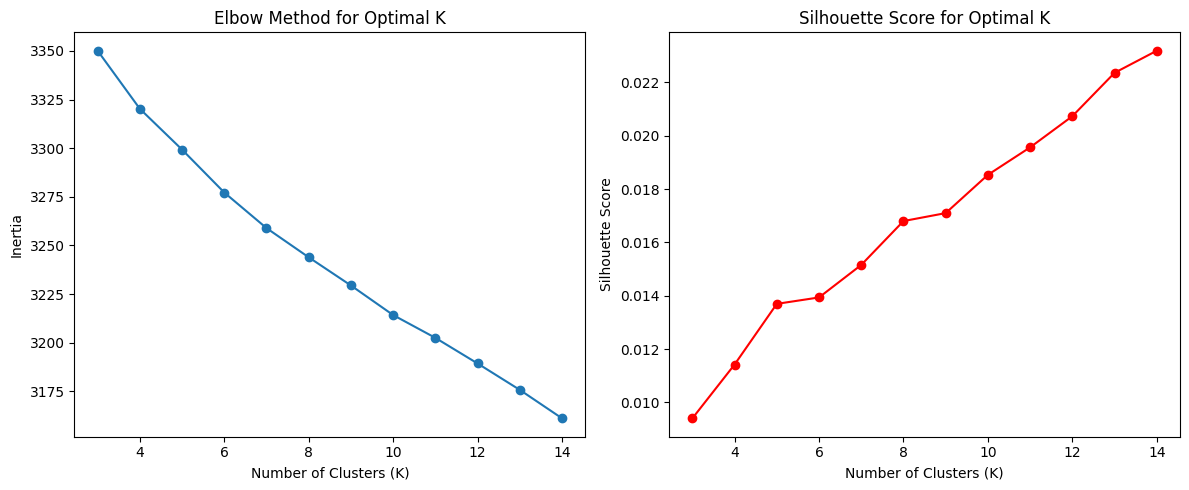

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# %% Find the Optimal Number of Clusters (Elbow Method & Silhouette Score)
inertia = []
silhouette_scores = []
K_range = range(3, 15)  # Start from 3 to avoid silhouette issues with k=2

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(vectorized_text)
    
    inertia.append(kmeans.inertia_)
    score = silhouette_score(vectorized_text, kmeans.labels_)
    silhouette_scores.append(score)

# %% Plot Elbow Method (Inertia)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")

# %% Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")

plt.tight_layout()
plt.show()


In [10]:
# Select optimal K (based on elbow method)
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
dataset['cluster'] = kmeans.fit_predict(vectorized_text)

print(f"K-Means clustering completed with {optimal_k} clusters.")


K-Means clustering completed with 6 clusters.


In [11]:
# %% Train ML Models (Decision Tree, Random Forest, Gradient Boosting)
X_train, X_test, y_train, y_test = train_test_split(vectorized_text, dataset['cluster'], test_size=0.2, random_state=42)


In [12]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)

In [13]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_preds)

In [ ]:
print(f"Decision Tree Accuracy: {dt_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")

In [14]:
# Recommendation Function
def recommend_ml(course_name, model):
    course_name_clean = course_name.strip().lower()
    
    if course_name_clean not in dataset['Course Name'].str.lower().values:
        print(f"Course '{course_name}' not found in dataset.")
        return
    
    try:
        course_index = dataset[dataset['Course Name'].str.lower() == course_name_clean].index[0]
        course_vector = vectorized_text[course_index].reshape(1, -1)
        predicted_cluster = model.predict(course_vector)[0]

        # Get recommended courses from the same cluster
        recommended_courses = dataset[dataset['cluster'] == predicted_cluster]['Course Name'].tolist()
        recommended_courses.remove(course_name)

        print(f"\nRecommended courses similar to '{course_name}' using {model.__class__.__name__}:")
        for course in recommended_courses[:6]:  # Show top 6 recommendations
            print(course)

    except IndexError:
        print(f"Error: Course '{course_name}' not found in dataset.")


In [15]:
recommend_ml('Business Strategy Business Model Canvas Analysis with Miro', rf_model)
print(f"Random Forest Accuracy: {rf_acc:.2f}")


Recommended courses similar to 'Business Strategy Business Model Canvas Analysis with Miro' using RandomForestClassifier:
Finance for Managers
Doing Business in China Capstone
Agile Projects  Developing Tasks with Taiga
Esports Management Capstone Project
Fundamentals of Management
Protecting Business Innovations via Patent
Random Forest Accuracy: 0.91


In [16]:
recommend_ml('Business Strategy Business Model Canvas Analysis with Miro', dt_model)
print(f"Decision Tree Accuracy: {dt_acc:.2f}")


Recommended courses similar to 'Business Strategy Business Model Canvas Analysis with Miro' using DecisionTreeClassifier:
Finance for Managers
Doing Business in China Capstone
Agile Projects  Developing Tasks with Taiga
Esports Management Capstone Project
Fundamentals of Management
Protecting Business Innovations via Patent
Decision Tree Accuracy: 0.83


In [ ]:
recommend_ml('Business Strategy in Practice (Project-centered Course)', gb_model)
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")